In [132]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [133]:
from abc import ABC, abstractmethod 

In [134]:
class maneuver_classifier(ABC):
    @abstractmethod
    def __init__(self, dataframe):
        self.dataframe = dataframe
        pass
    
    def train_data(self): #Trains on the provided data set
        pass
    
    def predict_data(self): #Predicts and tell the accuracy of the trained algorithm
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        pass

In [146]:
class SVM_algo(maneuver_classifier):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.algo = None
    
    def train_data(self): #Trains on the provided data set
        X = np.array(self.dataframe[:, :-1])
        y = np.array(self.dataframe[:, -1])
        
        print(X.shape)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        # defining parameter range 
        param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']} 
        
        grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 0)

        #grid.fit(X_train, y_train) 
        
        grid.fit(X, y) 
        
        
        self.algo = grid
        
        # print best parameter after tuning 
        print(grid.best_params_) 

        # print how our model looks after hyper-parameter tuning 
        print(grid.best_estimator_) 
        
        grid_predictions = grid.predict(X_test) 
        
        print(classification_report(y_test, grid_predictions)) 
        
        grid_confidence = grid.score(X_test, y_test)
        print(grid_confidence)
        
        cm = confusion_matrix(y_test, grid_predictions)
        
        print(cm)
        
        plot_confusion_matrix(grid, X_test, y_test)
        #cm.plot()
        
        plt.show()

        
        
        
    def predict_data(self, data): #Predicts and tell the accuracy of the trained algorithm
        data = self.ret_normalize_data(data)
        X = np.array(data[:, :-1])
        y = np.array(data[:, -1])
        
        print(X.shape)
        
        grid_predictions = self.algo.predict(X)
        print(classification_report(y, grid_predictions)) 
        
        for i in range(len(y)):
            print("Real: "+ y[i]+ " Predicted: " + grid_predictions[i] )
            
        
        
        grid_confidence = self.algo.score(X, y)
        print(grid_confidence)
        
        cm = confusion_matrix(y, grid_predictions)
        
        print(cm)
        
        plot_confusion_matrix(self.algo, X, y)
        #cm.plot()
        
        plt.show()
        
        
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        df = self.dataframe.drop(['maneuver'], 1)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,self.dataframe['maneuver']])
        self.dataframe = result
        pass

    def ret_normalize_data(self, data): #Normalizes data based on the requirement
        data = data.dropna()
        df = data.drop(['maneuver'], 1)
        #df = df.fillna(0)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,data['maneuver']])
        return result
        pass



In [147]:
train_acc_5 = pd.read_excel("train_processed_5frames_final.xlsx", "Acclerometer")
train_gyro_5 = pd.read_excel("train_processed_5frames_final.xlsx", "Gyroscope")
train_acc_6 = pd.read_excel("train_processed_6frames_final.xlsx", "Acclerometer")
train_gyro_6 = pd.read_excel("train_processed_6frames_final.xlsx", "Gyroscope")
train_acc_8 = pd.read_excel("train_processed_8frames_final.xlsx", "Acclerometer")
train_gyro_8 = pd.read_excel("train_processed_8frames_final.xlsx", "Gyroscope")

for i in range(3):
    train_acc_5 = train_acc_5.drop(train_acc_5.columns[0], axis=1)
    train_acc_6 = train_acc_6.drop(train_acc_6.columns[0], axis=1)
    train_acc_8 = train_acc_8.drop(train_acc_8.columns[0], axis=1)
    train_gyro_5 = train_gyro_5.drop(train_gyro_5.columns[0], axis = 1)
    train_gyro_6 = train_gyro_6.drop(train_gyro_6.columns[0], axis = 1)
    train_gyro_8 = train_gyro_8.drop(train_gyro_8.columns[0], axis = 1)



In [148]:
test_acc_5 = pd.read_excel("test_15_5_frames.xlsx","Acclerometer" )
test_gyro_5 = pd.read_excel("test_15_5_frames.xlsx","Gyroscope" )

#test_acc_6 = pd.read_excel("test_15_6_frames.xlsx","Acclerometer" )
#test_gyro_6 = pd.read_excel("test_15_6_frames.xlsx","Gyroscope" )

test_acc_8 = pd.read_excel("test_15_8_frames.xlsx","Acclerometer" )
test_gyro_8 = pd.read_excel("test_15_8_frames.xlsx","Gyroscope" )

for i in range(3):
    test_acc_5 = test_acc_5.drop(test_acc_5.columns[0], axis=1)
    #test_acc_6 = test_acc_6.drop(test_acc_6.columns[0], axis=1)
    test_acc_8 = test_acc_8.drop(test_acc_8.columns[0], axis=1)
    test_gyro_5 = test_gyro_5.drop(test_gyro_5.columns[0], axis = 1)
    #test_gyro_6 = test_gyro_6.drop(test_gyro_6.columns[0], axis = 1)
    test_gyro_8 = test_gyro_8.drop(test_gyro_8.columns[0], axis = 1)


(210, 57)
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
                              precision    recall  f1-score   support

     Aggressive acceleration       1.00      1.00      1.00         3
         Aggressive breaking       1.00      1.00      1.00         8
        Aggressive left turn       1.00      1.00      1.00        14
Aggressive right lane change       1.00      1.00      1.00         8
       Aggressive right turn       1.00      1.00      1.00        17
        Non-aggressive event       1.00      1.00      1.00        13

                    accuracy                           1.00        63
                   macro avg       1.00      1.00      1.00        63
                weighted avg       1.00      1.00      1.00        63

1.0
[

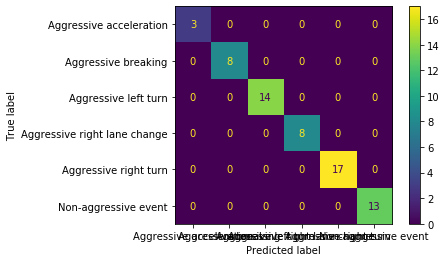

In [149]:
alg_acc_5 = SVM_algo(train_acc_5)
alg_acc_5.normalize_data()
alg_acc_5.train_data()


(45, 57)
                             precision    recall  f1-score   support

     Aggressive left U turn       0.00      0.00      0.00        15
Aggressive left lane change       0.00      0.00      0.00         4
       Aggressive left turn       0.50      0.15      0.24        13
      Aggressive right turn       0.32      1.00      0.48        13

                   accuracy                           0.33        45
                  macro avg       0.20      0.29      0.18        45
               weighted avg       0.24      0.33      0.21        45

Real: Aggressive left lane change Predicted: Aggressive left turn
Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left turn Predicted: Aggressive right turn
Real: Aggressive left turn Predicted: Aggressive right turn
Real: Aggressive left turn Predicted: Aggressive 

C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


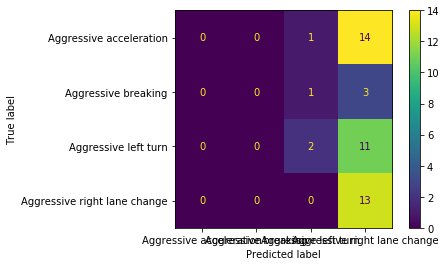

In [150]:
alg_acc_5.predict_data(test_acc_5)

(351, 93)
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

     Aggressive acceleration       1.00      0.95      0.97        19
         Aggressive breaking       1.00      0.89      0.94         9
        Aggressive left turn       0.95      0.95      0.95        21
Aggressive right lane change       1.00      1.00      1.00        16
       Aggressive right turn       1.00      0.91      0.95        23
        Non-aggressive event       0.82      1.00      0.90        18

                    accuracy                           0.95       106
                   macro avg       0.96      0.95      0.95       106
                weighted avg       0.96      0.95      0.95       106

0

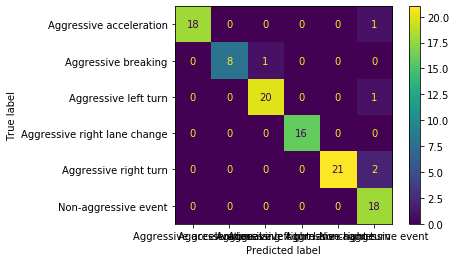

In [151]:
alg_acc_8 = SVM_algo(train_acc_8)
alg_acc_8.normalize_data()
alg_acc_8.train_data()


(66, 93)
                             precision    recall  f1-score   support

    Aggressive acceleration       0.00      0.00      0.00         0
        Aggressive breaking       0.00      0.00      0.00         0
     Aggressive left U turn       0.00      0.00      0.00        22
Aggressive left lane change       0.00      0.00      0.00         6
       Aggressive left turn       0.60      0.32      0.41        19
      Aggressive right turn       0.75      0.79      0.77        19
       Non-aggressive event       0.00      0.00      0.00         0

                   accuracy                           0.32        66
                  macro avg       0.19      0.16      0.17        66
               weighted avg       0.39      0.32      0.34        66

Real: Aggressive left lane change Predicted: Aggressive acceleration
Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left lane

C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


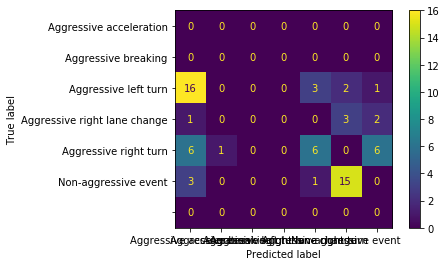

In [152]:
alg_acc_8.predict_data(test_acc_8)

(351, 93)
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
                              precision    recall  f1-score   support

     Aggressive acceleration       1.00      1.00      1.00         8
         Aggressive breaking       1.00      1.00      1.00        13
        Aggressive left turn       1.00      1.00      1.00        25
Aggressive right lane change       1.00      1.00      1.00        13
       Aggressive right turn       1.00      1.00      1.00        24
        Non-aggressive event       1.00      1.00      1.00        23

                    accuracy                           1.00       106
                   macro avg       1.00      1.00      1.00       106
                weighted avg       1.00      1.00      1.00       106

1.0
[

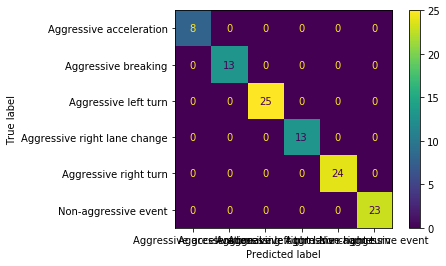

In [153]:
alg_gyro_8 = SVM_algo(train_gyro_8)
alg_gyro_8.normalize_data()
alg_gyro_8.train_data()


(66, 93)
                             precision    recall  f1-score   support

     Aggressive left U turn       0.00      0.00      0.00        22
Aggressive left lane change       0.00      0.00      0.00         6
       Aggressive left turn       0.29      1.00      0.45        19
      Aggressive right turn       0.00      0.00      0.00        19

                   accuracy                           0.29        66
                  macro avg       0.07      0.25      0.11        66
               weighted avg       0.08      0.29      0.13        66

Real: Aggressive left lane change Predicted: Aggressive left turn
Real: Aggressive left lane change Predicted: Aggressive left turn
Real: Aggressive left lane change Predicted: Aggressive left turn
Real: Aggressive left lane change Predicted: Aggressive left turn
Real: Aggressive left lane change Predicted: Aggressive left turn
Real: Aggressive left lane change Predicted: Aggressive left turn
Real: Aggressive left turn Predicted: Ag

C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


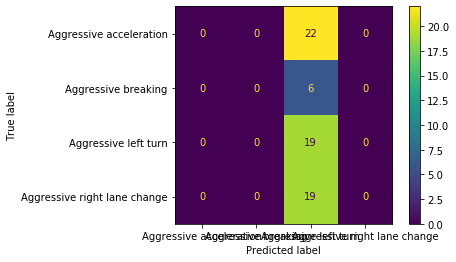

In [154]:
alg_gyro_8.predict_data(test_gyro_8)

(210, 57)
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
                              precision    recall  f1-score   support

     Aggressive acceleration       1.00      1.00      1.00        11
         Aggressive breaking       1.00      1.00      1.00        11
        Aggressive left turn       1.00      1.00      1.00        14
Aggressive right lane change       1.00      1.00      1.00         7
       Aggressive right turn       1.00      1.00      1.00        10
        Non-aggressive event       1.00      1.00      1.00        10

                    accuracy                           1.00        63
                   macro avg       1.00      1.00      1.00        63
                weighted avg       1.00      1.00      1.00        63

1.0

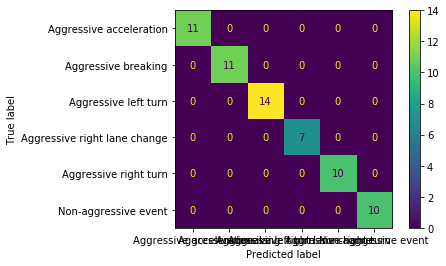

In [155]:
alg_gyro_5 = SVM_algo(train_gyro_5)
alg_gyro_5.normalize_data()
alg_gyro_5.train_data()


(45, 57)
                             precision    recall  f1-score   support

     Aggressive left U turn       0.00      0.00      0.00        15
Aggressive left lane change       0.00      0.00      0.00         4
       Aggressive left turn       0.48      0.77      0.59        13
      Aggressive right turn       0.33      0.62      0.43        13

                   accuracy                           0.40        45
                  macro avg       0.20      0.35      0.26        45
               weighted avg       0.23      0.40      0.29        45

Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left lane change Predicted: Aggressive right turn
Real: Aggressive left turn Predicted: Aggressive left turn
Real: Aggressive left turn Predicted: Aggressive right turn
Real: Aggressive left turn Predicted: Aggressive 

C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


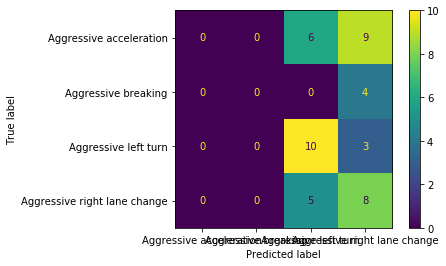

In [156]:
alg_gyro_5.predict_data(test_gyro_5)